In [6]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime

In [7]:
doge_csv_file = "../03-Presentations/Resources/archive/coin_Dogecoin.csv"
doge_data_df = pd.read_csv(doge_csv_file)

In [8]:
type(doge_data_df["Date"])

pandas.core.series.Series

In [9]:
doge_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [12]:
# Remove the rows with missing data
new_doge_data_df = doge_data_df.dropna(how="any")
new_doge_data_df.count()
# Display a statistical overview of the DataFrame
new_doge_data_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,1380.500000,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,796.887696,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,690.750000,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,1380.500000,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,2070.250000,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,2760.000000,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


In [13]:
doge_data_df['DateOnly'] = new_doge_data_df['Date'].map(lambda x: x.split()[0])
doge_data_df.head()
doge_data_df['TimeOnly'] = new_doge_data_df['Date'].map(lambda x: x.split()[1])
doge_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DateOnly,TimeOnly
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06,2013-12-16,23:59:59
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06,2013-12-17,23:59:59
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06,2013-12-18,23:59:59
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07,2013-12-19,23:59:59
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06,2013-12-20,23:59:59


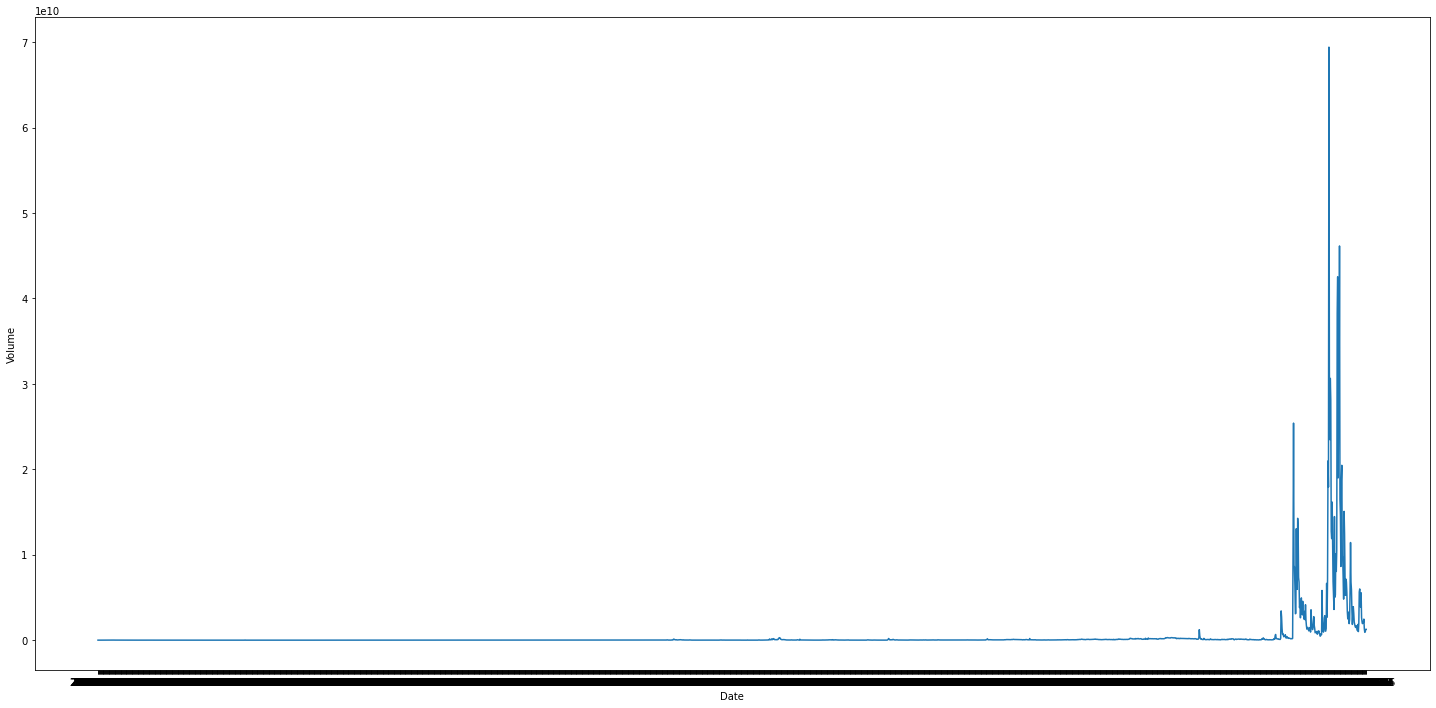

In [14]:
plt.figure(figsize=(25, 12))
x = range(len(doge_data_df['DateOnly']))
plt.plot(x, doge_data_df['Volume'])
plt.xticks(x, doge_data_df['DateOnly'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [15]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [16]:
new_doge_data_df = doge_data_df[["Name", "High", "Low"]].copy()
new_doge_data_df.head()

,Name,High,Low
0,Dogecoin,0.000866,0.000150
1,Dogecoin,0.000289,0.000116
2,Dogecoin,0.000362,0.000205
3,Dogecoin,0.001520,0.000328
4,Dogecoin,0.001143,0.000662


In [17]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [18]:
new_doge_data_df.to_sql(name='Doge', con=engine, if_exists='append', index=False)

In [19]:
pd.read_sql_query('select * from "Doge"', con=engine)

,Name,High,Low
0,Dogecoin,0.000866,0.000150
1,Dogecoin,0.000289,0.000116
2,Dogecoin,0.000362,0.000205
3,Dogecoin,0.001520,0.000328
4,Dogecoin,0.001143,0.000662
...,...,...,...
16555,Dogecoin,0.247997,0.238848
16556,Dogecoin,0.250214,0.242454
16557,Dogecoin,0.252567,0.243425
16558,Dogecoin,0.246419,0.227838
